In [2]:
import numpy as np 
import os 
import cv2 
import matplotlib.pyplot as plt 
import numpy as np
import argparse
import random
import time
from skimage.feature import hog
from skimage import data, exposure

In [4]:
image = cv2.imread('C:\\Users\\Sankalp\\Desktop\\Minor\\Potholes\\My Dataset\\train\\Pothole\\a37.jpg',1) 

In [5]:
x = image

C:\Users\Sankalp\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == '__main__':
C:\Users\Sankalp\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


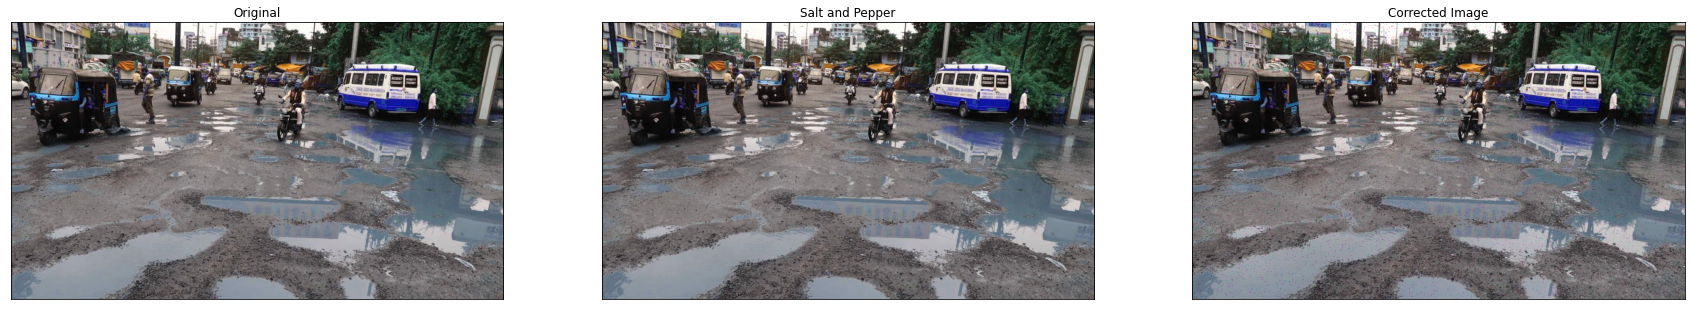

In [27]:
def salt_and_pepper(image):
      row,col,ch = image.shape
      salt_and_pepper = 0.5
      amount =0.005
      out = np.copy(image)
      
      salt = np.ceil(amount * image.size * salt_and_pepper)
      cds = [np.random.randint(0, i - 1, int(salt)) for i in image.shape]
      out[cds] = 1

      pepper = np.ceil(amount* image.size * (1. - salt_and_pepper))
      cds = [np.random.randint(0, i - 1, int(pepper)) for i in image.shape]
      out[cds] = 0
      return out

median_blur= cv2.medianBlur(x, 3)

S_and_P = salt_and_pepper(image)
plt.figure(figsize = (30,30))
plt.subplot(1,3,1),plt.imshow(image,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(x,cmap = 'gray')
plt.title('Salt and Pepper'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(S_and_P,cmap = 'gray')
plt.title('Corrected Image'), plt.xticks([]), plt.yticks([])
plt.show()

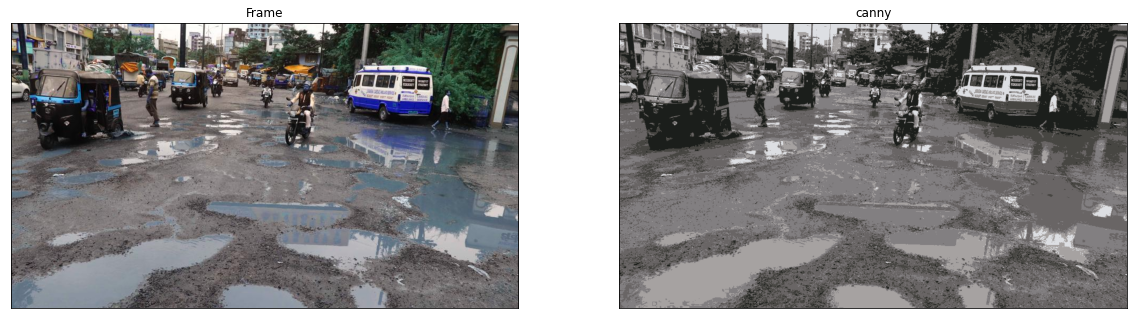

In [28]:
def k_means(image):
    

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

    pixel_vals = image.reshape((-1,3)) 
  

    pixel_vals = np.float32(pixel_vals)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 
  
    k = 6
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)  
 
    centers = np.uint8(centers) 
    segmented_data = centers[labels.flatten()] 
    segmented_image = segmented_data.reshape((image.shape)) 
    
    return segmented_image


plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(image),plt.title('Frame')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(k_means(image)),plt.title('canny')
plt.xticks([]), plt.yticks([])
plt.show()

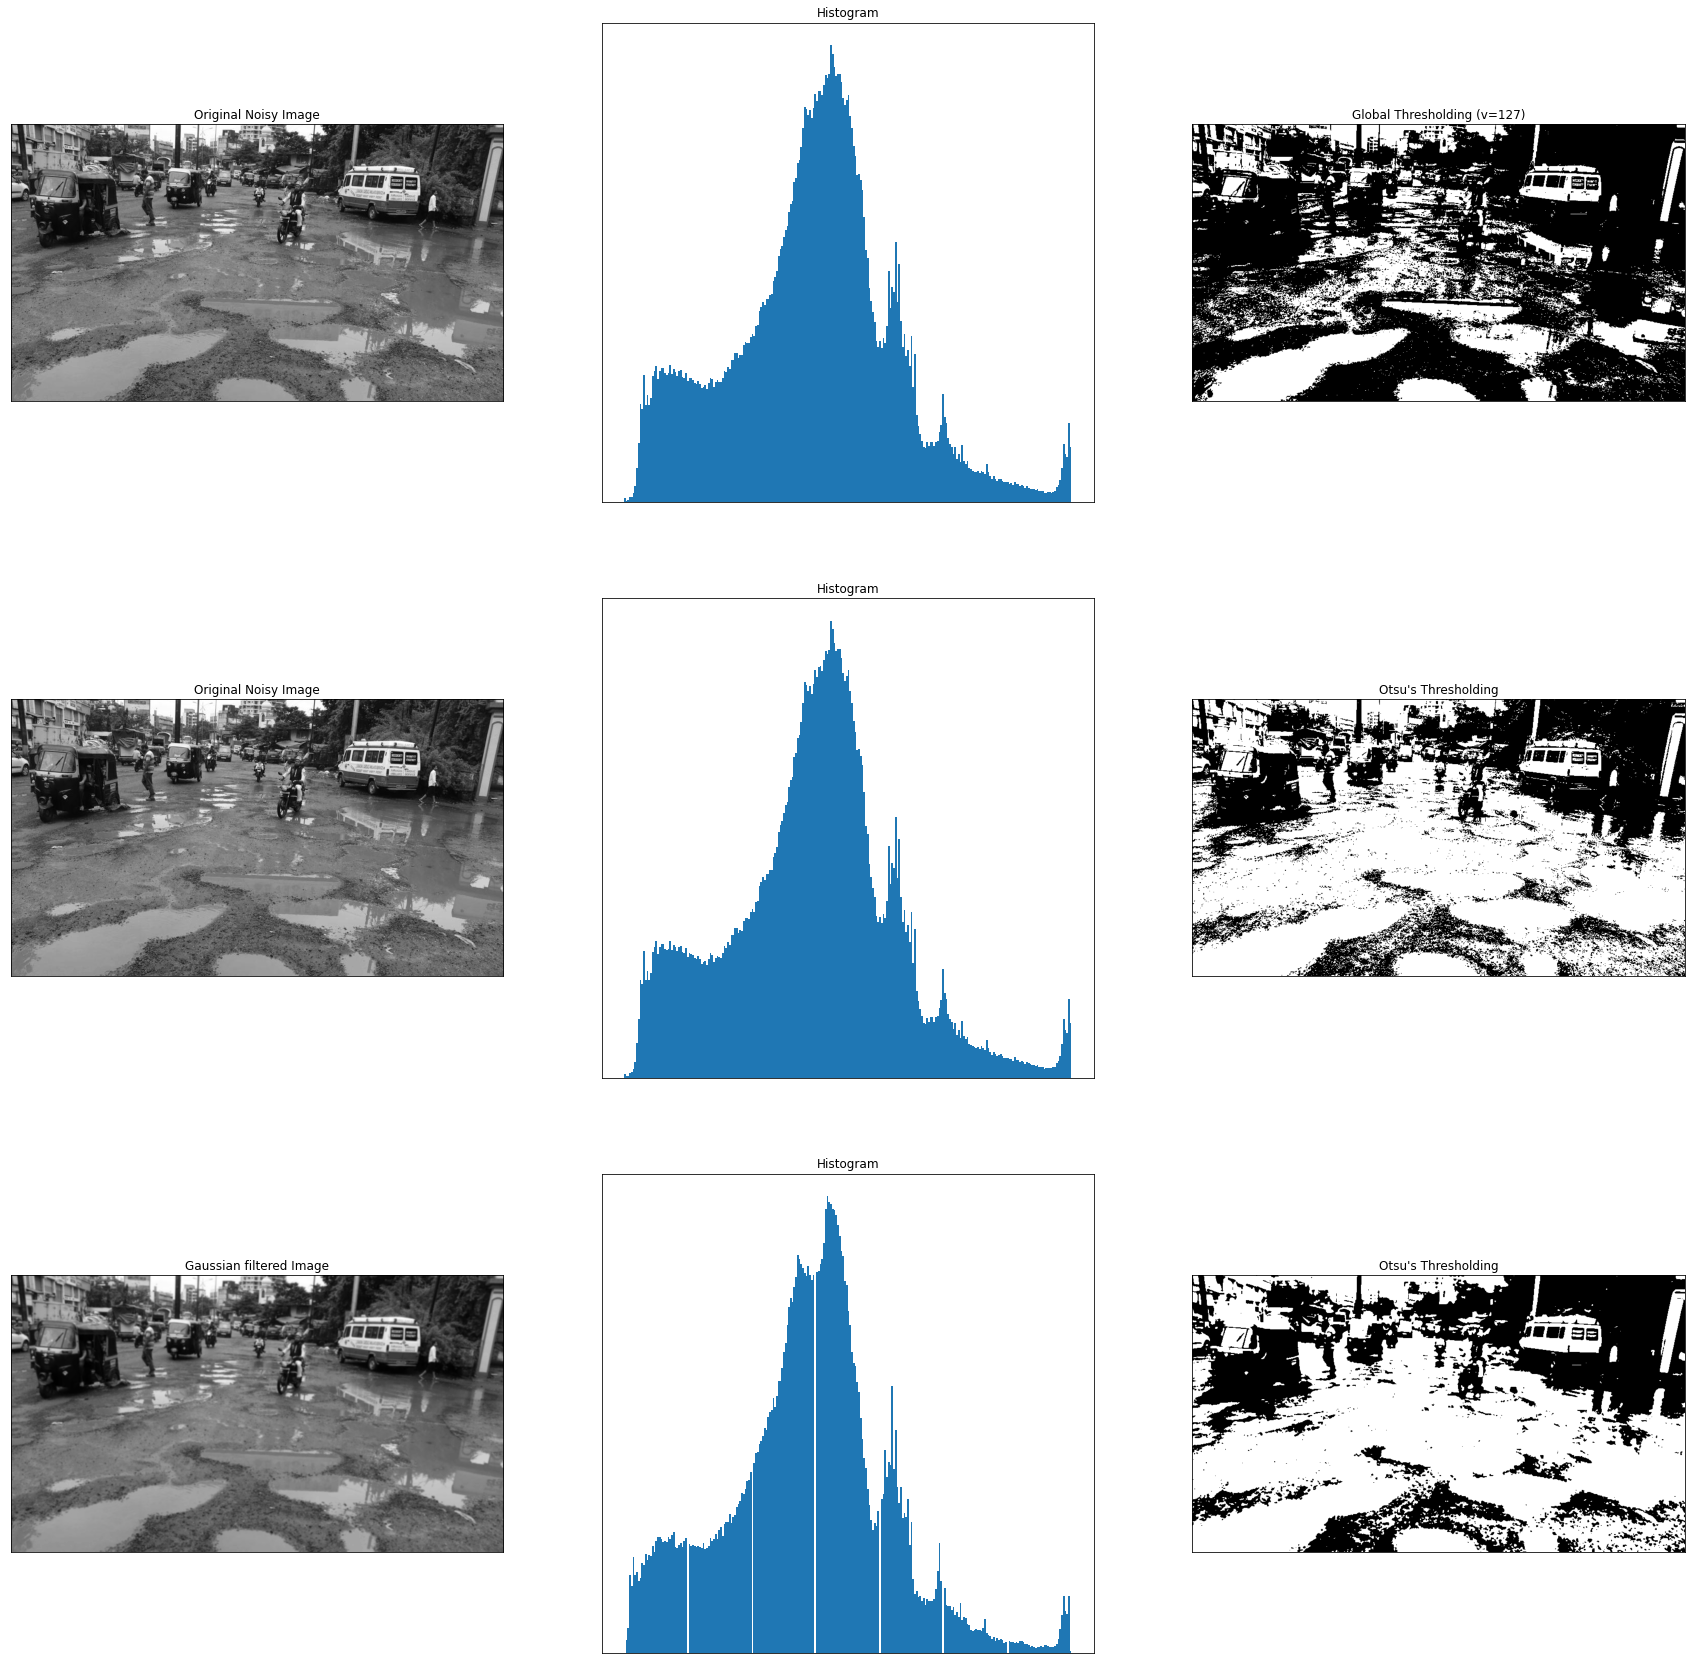

In [31]:
def threshold(img):
    

    ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

    ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    blur = cv2.GaussianBlur(img,(5,5),0)
    ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


    images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
    titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
    
    
    plt.figure(figsize = (30,30))
    for i in range(3):
        plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
        plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
        plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
        plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
        plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
        plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    plt.show()
threshold(cv2.imread('C:\\Users\\Sankalp\\Desktop\\Minor\\Potholes\\My Dataset\\train\\Pothole\\a37.jpg',0))

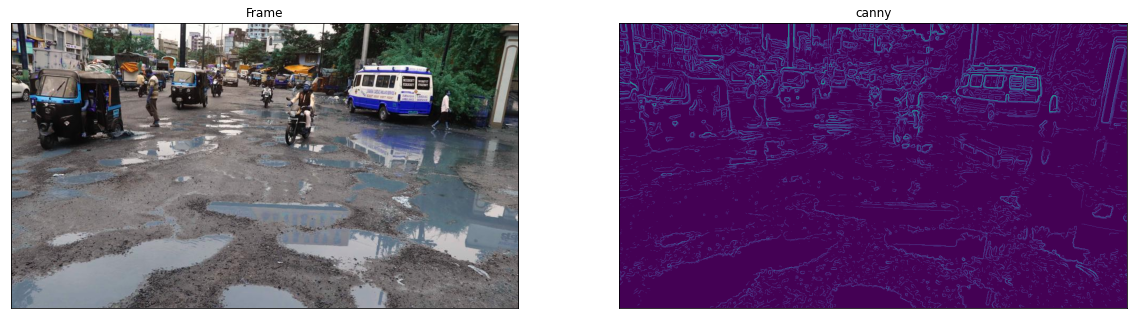

In [8]:
def Canny_detector(img, weak_th = None, strong_th = None): 
 

 img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
 
 img = cv2.GaussianBlur(img, (5, 5), 1.4) 
 
 gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3) 
 gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3) 
 
 mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True) 
 
 mag_max = np.max(mag) 
 if not weak_th:
        weak_th = mag_max * 0.1
 if not strong_th:
    strong_th = mag_max * 0.7
 
 height, width = img.shape 
 
 for i_x in range(width): 
  for i_y in range(height): 
   
   grad_ang = ang[i_y, i_x] 
   grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang) 
   
   if grad_ang<= 22.5: 
    neighb_1_x, neighb_1_y = i_x-1, i_y 
    neighb_2_x, neighb_2_y = i_x + 1, i_y 
   
   elif grad_ang>22.5 and grad_ang<=(22.5 + 45): 
    neighb_1_x, neighb_1_y = i_x-1, i_y-1
    neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
   

   elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90): 
    neighb_1_x, neighb_1_y = i_x, i_y-1
    neighb_2_x, neighb_2_y = i_x, i_y + 1
   

   elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135): 
    neighb_1_x, neighb_1_y = i_x-1, i_y + 1
    neighb_2_x, neighb_2_y = i_x + 1, i_y-1
   

   elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180): 
    neighb_1_x, neighb_1_y = i_x-1, i_y 
    neighb_2_x, neighb_2_y = i_x + 1, i_y 
   

   if width>neighb_1_x>= 0 and height>neighb_1_y>= 0: 
    if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]: 
     mag[i_y, i_x]= 0
     continue

   if width>neighb_2_x>= 0 and height>neighb_2_y>= 0: 
    if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]: 
     mag[i_y, i_x]= 0

 weak_ids = np.zeros_like(img) 
 strong_ids = np.zeros_like(img)    
 ids = np.zeros_like(img) 
 

 for i_x in range(width): 
  for i_y in range(height): 
   
   grad_mag = mag[i_y, i_x] 
   
   if grad_mag<weak_th: 
    mag[i_y, i_x]= 0
   elif strong_th>grad_mag>= weak_th: 
    ids[i_y, i_x]= 1
   else: 
    ids[i_y, i_x]= 2
 
 

 return mag 


canny_img = Canny_detector(image) 



plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(image),plt.title('Frame')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(canny_img),plt.title('canny')
plt.xticks([]), plt.yticks([])
plt.show()

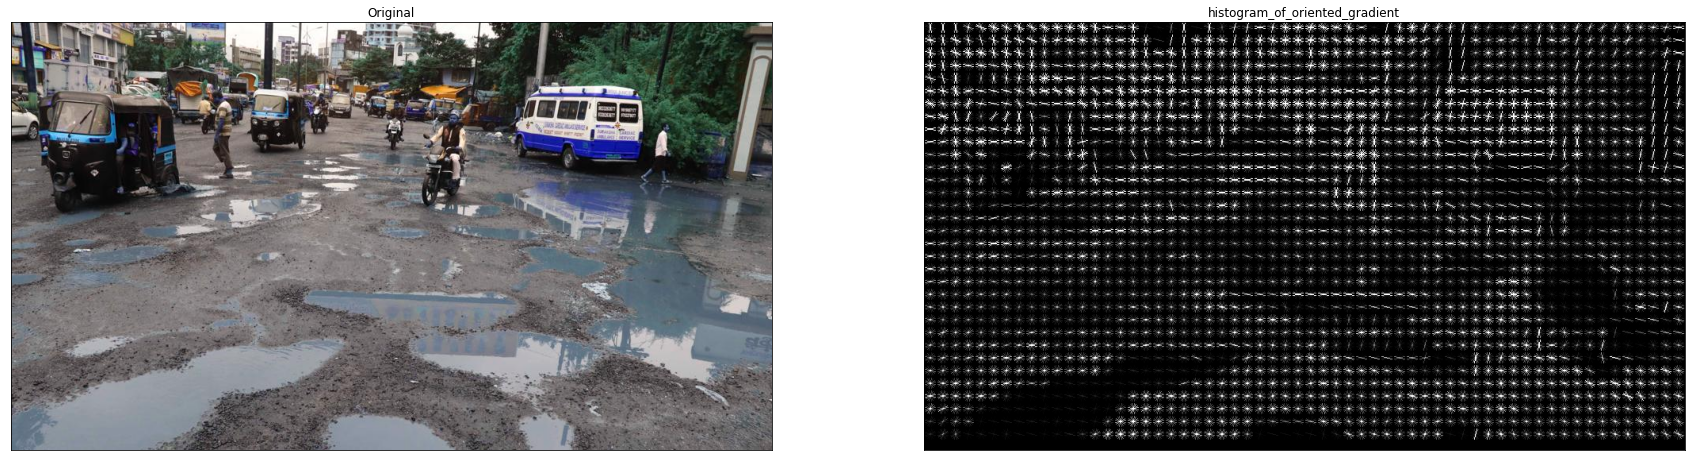

In [33]:
def histogram_of_oriented_gradient(image):


    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)


    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    plt.figure(figsize = (30,30))
    plt.subplot(1,2,1),plt.imshow(image,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(hog_image_rescaled,cmap = 'gray')
    plt.title('histogram_of_oriented_gradient'), plt.xticks([]), plt.yticks([])
    plt.show()
histogram_of_oriented_gradient(image)